### Importing Modules

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from plotly.offline import init_notebook_mode,iplot
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

## Exploratory Data Analysis 

In [10]:
df_reviews = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
df_reviews

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [21]:
df_movies = pd.read_csv('rotten_tomatoes_movies.csv')
df_movies

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2016-04-19,104.0,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2015-11-25,142.0,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2017-01-08,135.0,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [22]:
df_movies.shape

(17712, 22)

In [62]:
df_movies.describe().T

,count,mean,std,min,25%,50%,75%,max
runtime,16382.0,102.662495,1.871850e+01,8.0,91.00,100.0,111.00,266.0
tomatometer_rating,16514.0,60.515320,2.837839e+01,0.0,38.00,66.0,85.00,100.0
tomatometer_count,16514.0,59.897663,6.962822e+01,5.0,13.00,31.0,82.00,574.0
audience_rating,16379.0,60.727822,2.044355e+01,0.0,45.00,63.0,78.00,100.0
audience_count,16378.0,152785.314507,1.818180e+06,5.0,877.25,4974.5,29313.25,35797635.0
tomatometer_top_critics_count,16546.0,15.326242,1.532114e+01,0.0,3.00,9.0,25.00,69.0
tomatometer_fresh_critics_count,16546.0,38.106733,5.383639e+01,0.0,6.00,17.0,46.00,497.0
tomatometer_rotten_critics_count,16546.0,21.750937,3.088900e+01,0.0,4.00,9.0,26.00,303.0
movie_year,16546.0,1999.579113,1.960154e+01,1914.0,1993.00,2006.0,2013.00,2020.0


In [23]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [24]:
df_movies = df_movies[df_movies.original_release_date.notnull()]
df_movies['original_release_date'] = pd.to_datetime(df_movies['original_release_date'])
df_movies['movie_year'] = df_movies['original_release_date'].apply(lambda x: x.year)

In [25]:
type(df_movies.movie_year[0])

numpy.int64

In [26]:
type(df_movies.original_release_date[0])

pandas._libs.tslibs.timestamps.Timestamp

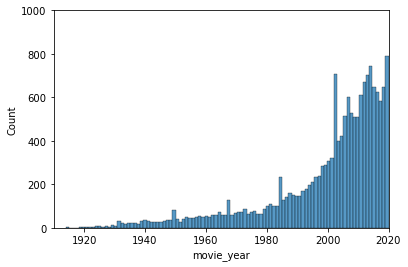

In [37]:
fig, ax = plt.subplots()
sns.histplot(x="movie_year", data=df_movies, bins=100)
ax.set_xlim([1910,2020])
ax.set_ylim([0,1000]);

In [28]:
df_movies.describe(include=["object", "datetime", "float"])

<ipython-input-28-90f9f725ef15>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count
count,16546,16546,16377,8885,16546,16539,16390,15224,16275,16546,16305,16382.000000,16210,16514,16514.000000,16514.000000,16228,16379.000000,1.637800e+04
unique,16546,16004,16376,8883,6,1070,8269,12236,16264,5804,2191,NaN,2806,3,NaN,NaN,2,NaN,NaN
top,m/operation_endgame,Hamlet,"Wisecracking mercenary Deadpool meets Russell,...",High Life is as visually arresting as it is ch...,R,Drama,Clint Eastwood,Woody Allen,Werner Herzog,2002-01-01 00:00:00,2016-08-10,NaN,Paramount Pictures,Rotten,NaN,NaN,Upright,NaN,NaN
freq,1,5,2,2,6180,1754,37,33,4,29,1182,NaN,510,7158,NaN,NaN,8892,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1914-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.662495,NaN,NaN,60.515320,59.897663,NaN,60.727822,1.527853e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.718502,NaN,NaN,28.378388,69.628216,NaN,20.443553,1.818180e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,0.000000,5.000000,NaN,0.000000,5.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,NaN,NaN,38.000000,13.000000,NaN,45.000000,8.772500e+02


In [29]:
# movie_title column is not unique.
# The data covers 1914-2020 period.
# Most common genre is Drama.

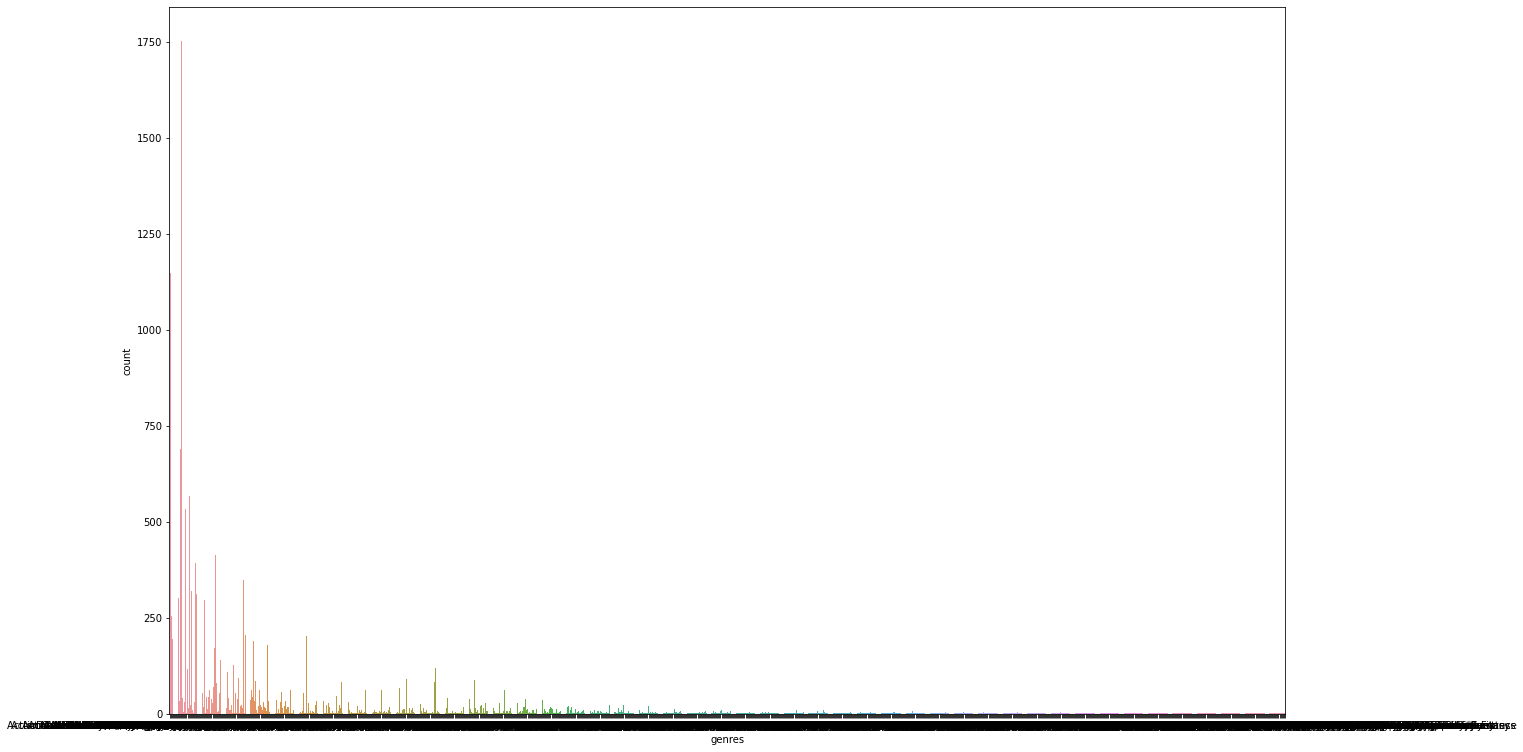

In [43]:
plt.figure(figsize=(20, 13))
sns.countplot(x='genres', data=df_movies);

In [31]:
df_reviews.isnull().sum()

rotten_tomatoes_link         0
critic_name              18529
top_critic                   0
publisher_name               0
review_type                  0
review_score            305936
review_date                  0
review_content           65806
dtype: int64

In [ ]:
# There are 305936 missing values of 1130017 review scores.

In [38]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


In [39]:
df_reviews = df_reviews[df_reviews.review_date.notnull()]
df_reviews['review_date'] = pd.to_datetime(df_reviews['review_date'])
df_reviews['review_year'] = df_reviews['review_date'].apply(lambda x: x.year)
df_reviews = df_reviews[df_reviews.review_year.astype(int) >= 2000]

In [40]:
type(df_reviews.review_year[0])

numpy.int64

In [41]:
type(df_reviews.review_date[0])

pandas._libs.tslibs.timestamps.Timestamp

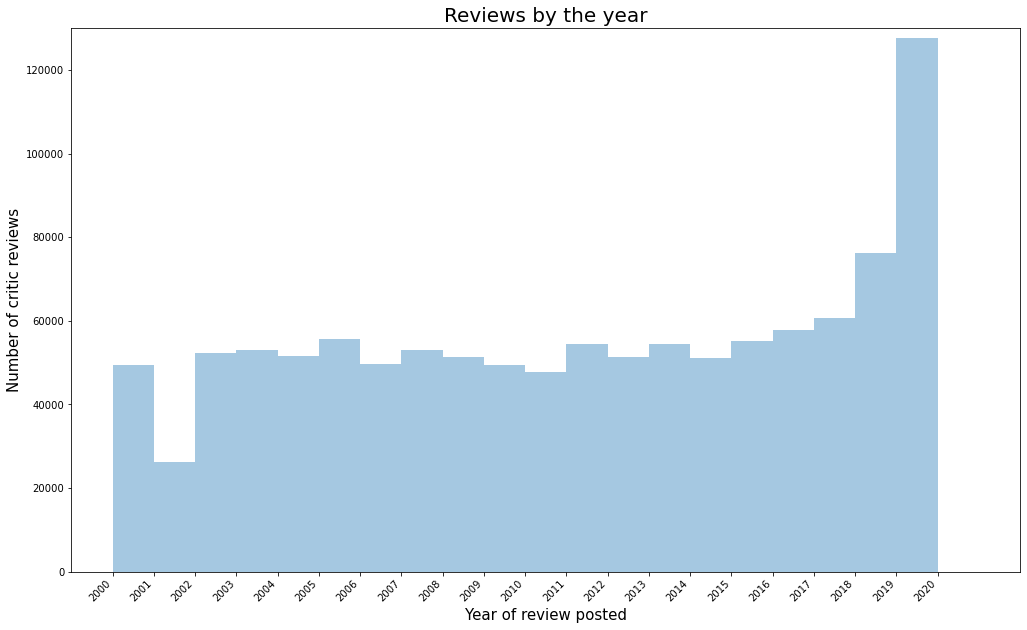

In [60]:
plt.figure(figsize=(17,10))
plt.title('Reviews by the year', size=20)
sns.distplot(df_reviews.review_year, bins=20, kde=False)
plt.ylabel('Number of critic reviews', size=15)
plt.xlabel('Year of review posted',size=15)
plt.axis([1999, 2022, 0, 130000])
plt.xticks(np.arange(2000, 2021, step=1),rotation=45, ha='right')
plt.show();